#Strojno i duboko učenje  - Klasifikacija


##Poznate vrste klasifikacija

**K-Nearest Neighbors**:
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**Naive Bayes**:
* https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

**Logistic Regression**:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

**Support Vector Machines**:
* https://scikit-learn.org/stable/modules/svm.html#svm

**Linear and Quadratic Discriminant Analysis**:
* https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda

#K-Nearest Neighbors



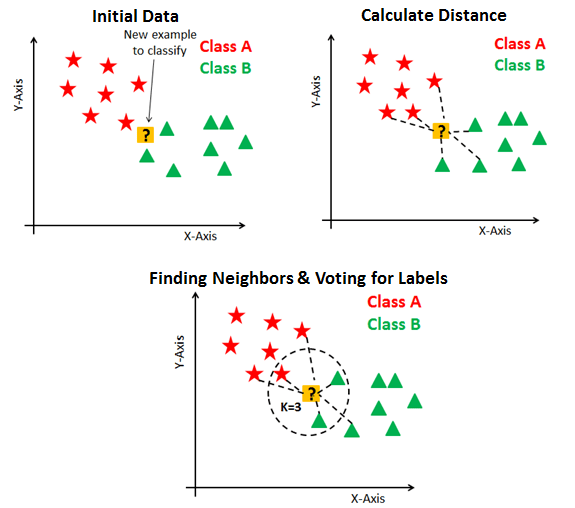

##Dohvaćanje i podjela podataka

In [ ]:
from sklearn import datasets
baza = datasets.load_iris()

In [ ]:
baza.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
baza.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
baza.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
baza.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X=baza.data
y=baza.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.50, random_state=42)

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test

##Definiranje modela klasifikacije

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

##Analiza rezultata - metrike


###Točnost (eng. Accuracy)

***Accuracy*** is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions

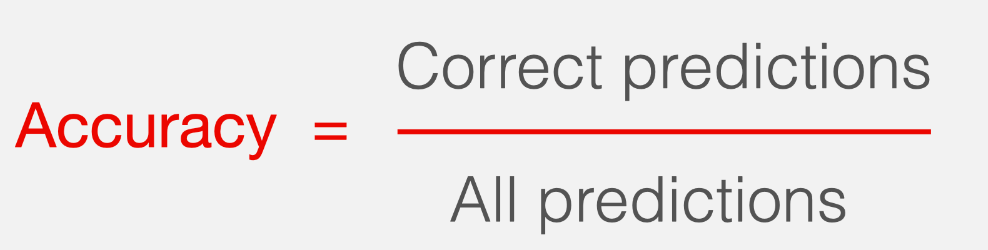

Accuracy is a helpful metric when you deal with balanced classes and care about the overall model “correctness” and not the ability to predict a specific class.


In [ ]:
#točnost
knn.fit(X_train, y_train)

<bound method ClassifierMixin.score of KNeighborsClassifier()>

In [ ]:
y_pred_KNN=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_KNN)

0.9466666666666667

In [ ]:
klasa={0:'setosa',1:'versicolor',2:'virginica'}

In [ ]:
print("Za prvi cvijet iz skupa za testiranje predvidena je klasa {}, a stvarna klasa je {}.".format(klasa[y_pred_KNN[0]],klasa[y_test[0]]))

Za prvi cvijet iz skupa za testiranje predvidena je klasa versicolor, a stvarna klasa je versicolor.


###Matrica konfuzije


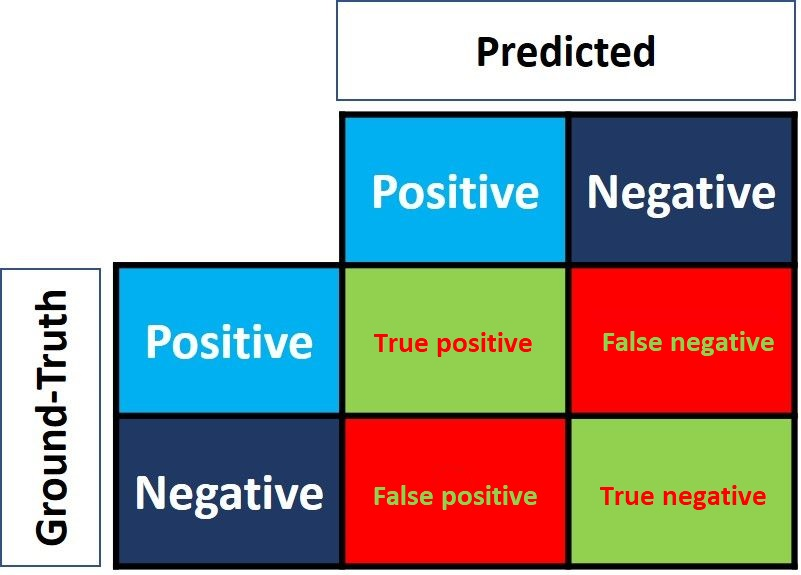

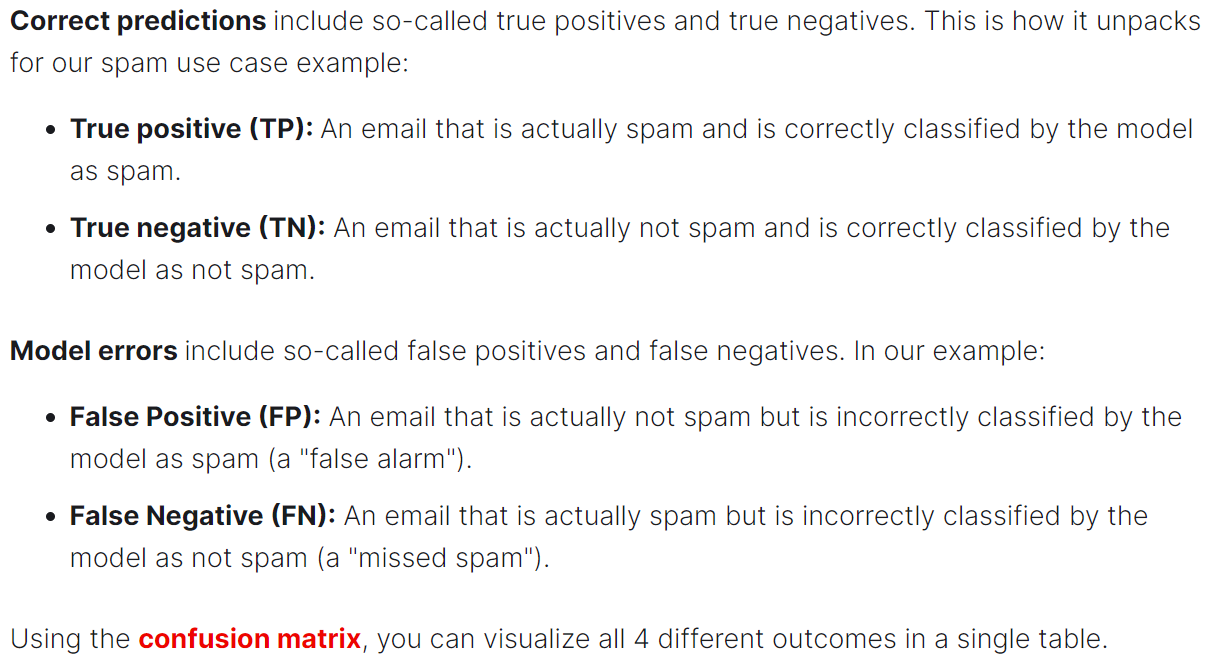

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_KNN)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 19]])

###Preciznost (eng. Precision)

***Precision*** is a metric that measures how often a machine learning model correctly predicts the positive class. You can calculate precision by dividing the number of correct positive predictions (true positives) by the total number of instances the model predicted as positive (both true and false positives).

**Preciznost:** udio točno klasificiranih primjera u skupu pozitivno klasificiranih

**Odgovara na pitanje: Koliko često su pozitivna predviđanja točna?**

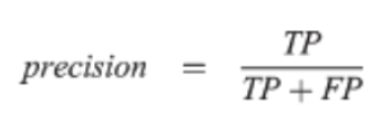

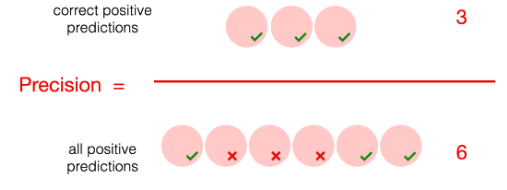

It works well for problems with **imbalanced classes** since it shows the model correctness in identifying the target class.

Precision is useful when the cost of a false positive is high. In this case, you typically want to **be confident in identifying the target class, even if you miss out on some (or many) instances**.

In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score
# preciznost za svaku klasu
precision_score(y_test, y_pred_KNN, average=None)

array([1.        , 0.85185185, 1.        ])

In [ ]:
#preciznost za cijeli model
precision_score(y_test, y_pred_KNN, average="weighted")

0.9545679012345679

###Odaziv (eng. Recall)

**Recall** is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances. The latter includes true positives (successfully identified cases) and false negative results (missed cases).

**Odaziv**:je udio točno klasificiranih primjera u skupu svih pozitivnih primjera

**Odgovara na pitanje: može li model pronaći sve instance pozitivne klase?**

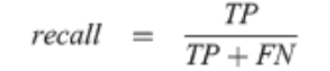

Recall is useful when the cost of false negatives is high. In this case, you typically **want to find all objects of the target class, even if this results in some false positives (predicting a positive when it is actually negative**).

In [ ]:
from sklearn.metrics import recall_score
#odaziv za svaku klasu
recall_score(y_test, y_pred_KNN, average=None)

array([1.        , 1.        , 0.82608696])

###Preciznost i odaziv

Koriste se u kombinaciji

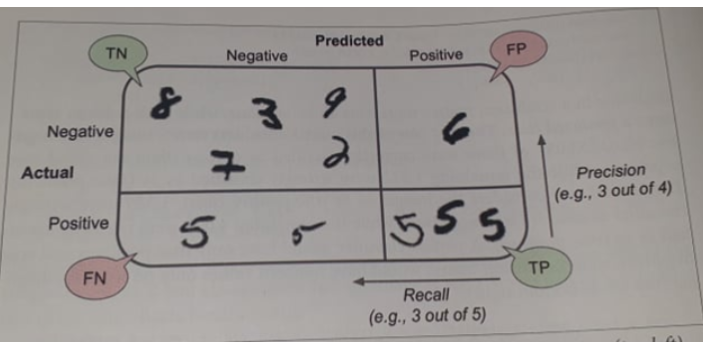

**100% Precision:** No false positives, every positive prediction is correct.

**100% Recall:** No false negatives, every negative prediction is correct.

####Precision/Recall Trade-off

Unfortunately, you can’t have both precision and recall high. **If you increase precision, it will reduce recall, and vice versa.** This is called the precision/recall tradeoff.

Example of High Precision: As we know we have multiple platform for video streaming like well known YouTube, you have restricted mode to restrict the violent and adult videos for the kids. So model focus on high precision {TP/(TP+FP)} by reducing the false positive. Means If model has classified the video is good for kids it must be safe to watch by kids. So, this can be done by reducing the false positive. Which will make higher Precision

###F1 score
Mjera koja kombinira preciznost i odaziv

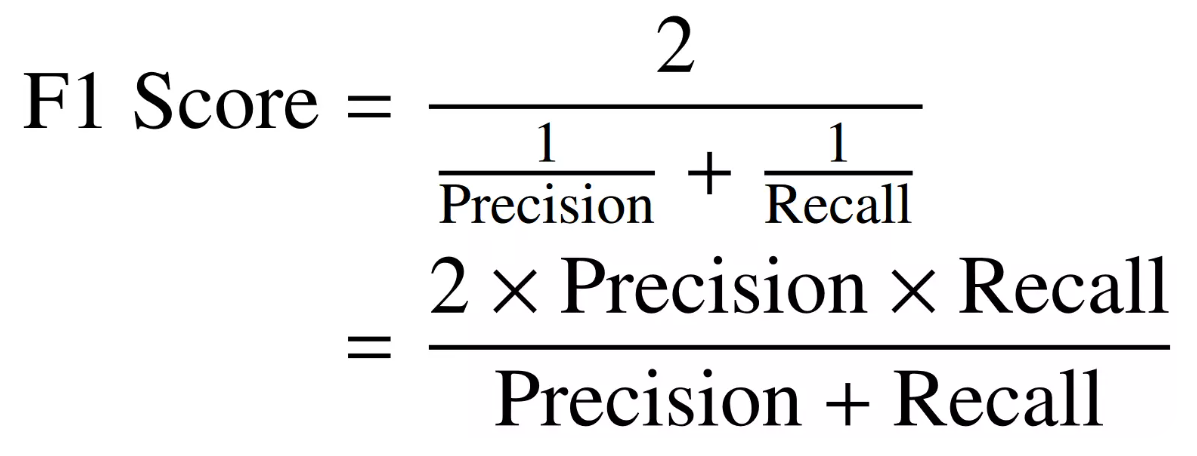

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_KNN, average=None)
f1_score(y_test, y_pred_KNN, average="weighted")


0.9462603174603175

###Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



##Zadatak: KNN
* isprobati KNN modele za različiti broj susjeda (npr od 1 do 20)
* izabrat optimalni model obzirom na točnost (pronaci kad je max)
* nacrtati graf sa tocnostima

In [ ]:
# isprobati za različiti broj susjeda i onda izabrat optimalni model
tocnosti = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred_KNN2 = knn.predict(X_test)
  tocnosti.append(accuracy_score(y_test, y_pred_KNN2))

tocnosti

[0.9733333333333334,
 0.96,
 0.9733333333333334,
 0.9333333333333333,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.96,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.96,
 0.9466666666666667,
 0.9733333333333334,
 0.96,
 0.96,
 0.9466666666666667,
 0.96]

##Zadatak: GaussianNB
* napraviti model na iris datasetu, podaci mogu ostat oni od prije
* izračunati točnost, prikazati classification report
*s kojim modelom smo postigli bolje rezultate?





#Logistička regresija - MNIST dataset


Po uzoru na skriptu https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb


##MNIST handwritten digits


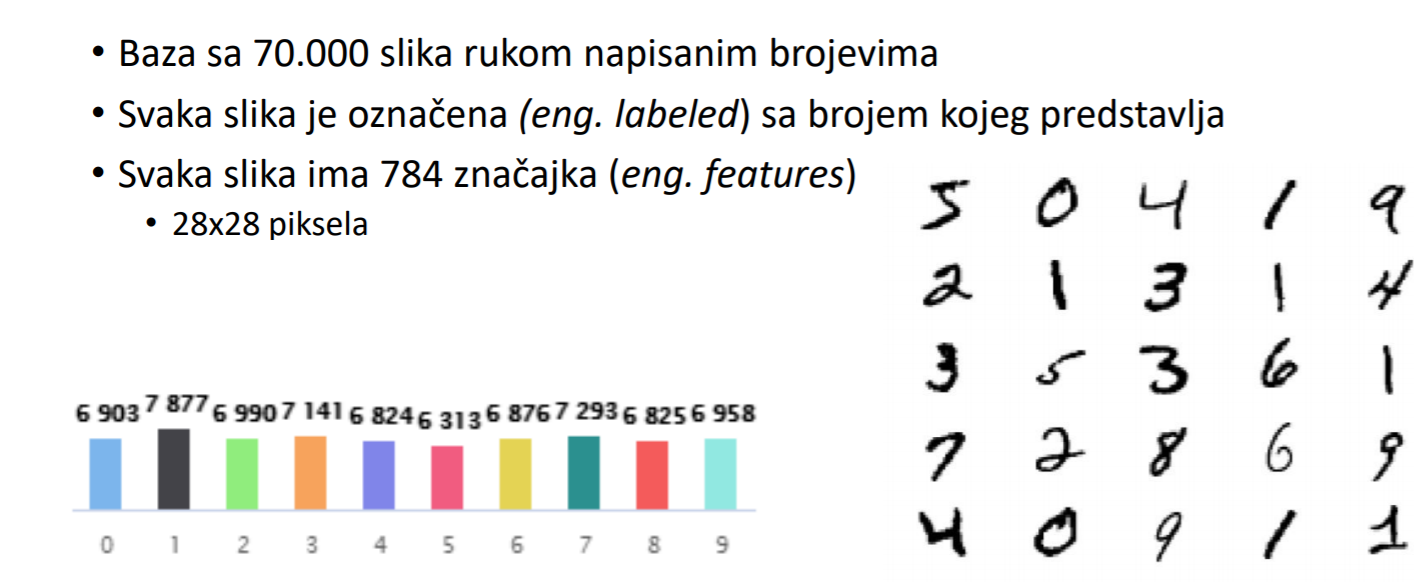

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
import numpy as np
podaci=np.array(mnist.data)

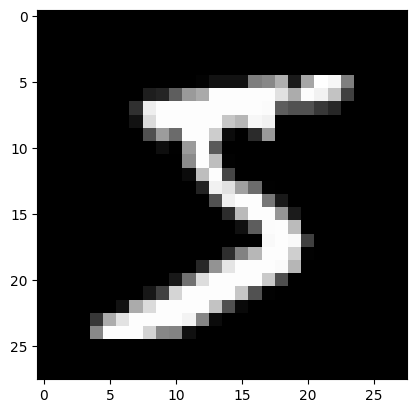

In [ ]:
#prikazati prvu sliku i njenu klasu
sl = podaci[0].reshape(28, 28)
import matplotlib.pyplot as plt
plt.imshow(sl,cmap="gray")
plt.show()

In [ ]:
mnist.target[0]

'5'

The main objective of database normalization is to eliminate redundant data, minimize data modification errors, and simplify the query process. Ultimately, normalization goes beyond simply standardizing data, and can even improve workflow, increase security, and lessen costs.

####Definiranje podataka za model koji raspoznaje radi li se o broju 5

In [ ]:
X=podaci[0:1000] / 255
y=np.array(mnist.target[0:1000])
y[np.where(y!='5')]=0
y[np.where(y=='5')]=1
y=y.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_trian,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(700, 784)

##Logistic regression

Koristimo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)

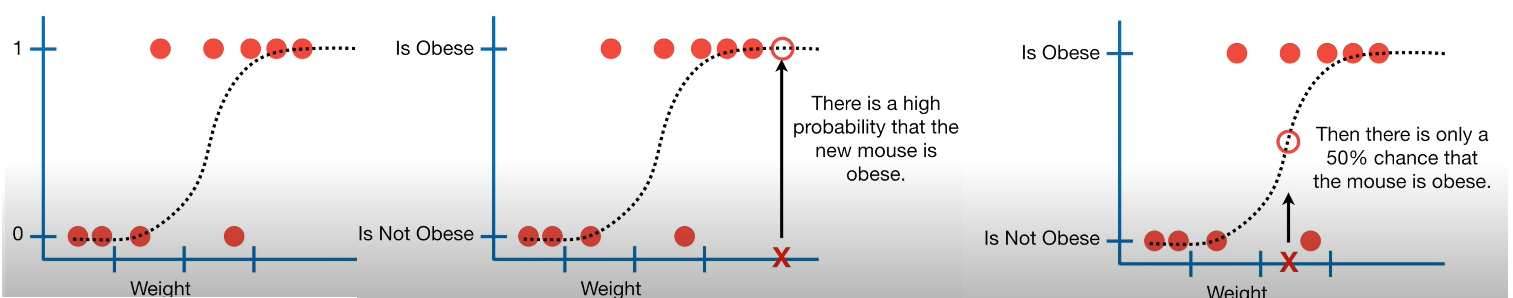

Više o logističkog regresiji na poveznici od 03:10: https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_trian)

LogisticRegression()

In [ ]:
y_log_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test, y_log_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98       273\n           1       0.85      0.63      0.72        27\n\n    accuracy                           0.96       300\n   macro avg       0.91      0.81      0.85       300\nweighted avg       0.95      0.96      0.95       300\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_log_pred)

array([[270,   3],
       [ 10,  17]])

In [ ]:
y_pred_LogR = log_reg.predict(X_test)

In [ ]:
#pogrešno klasificirani

misclassified_index=[]
for i in range (y_test.shape[0]):
 if y_test[i] != y_pred_LogR[i]:
  misclassified_index.append(i)

misclassified_index

[2, 15, 46, 51, 104, 106, 147, 166, 174, 204, 226, 242, 257]

In [ ]:
misclassified_index

[2, 15, 46, 51, 104, 106, 147, 166, 174, 204, 226, 242, 257]

In [ ]:
X_test.shape

(300, 784)

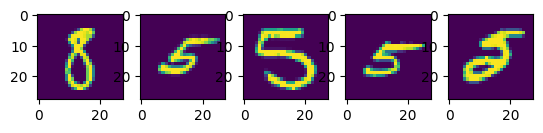

In [ ]:
#prikaz prvih 5 pogrešno klasificiranih
#
for i,index in enumerate(misclassified_index[0:5]):
  plt.subplot(1,5,i+1)
  plt.imshow(X_test[misclassified_index[i]].reshape(28,28))
plt.show()

###ROC analiza

Više o ROC analizi (u kombinaciji sa logističkom regresijom) pogledajte na: https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer

***An ROC curve*** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
*tekst u kurzivu*
This curve plots two parameters: True Positive Rate (odaziv), False Positive Rate

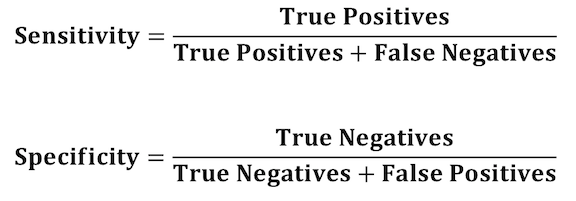

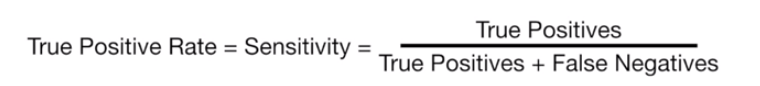

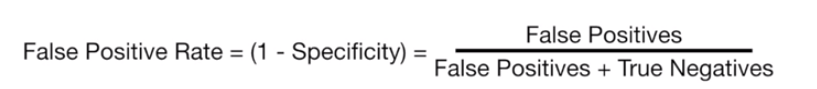

* Korisno za usporedbu više modela.
* bolje korisiti precision/recall kada je pozitivnih klasa malo
* što je veća TPR, više false positiva ce klasifikator proizvesti


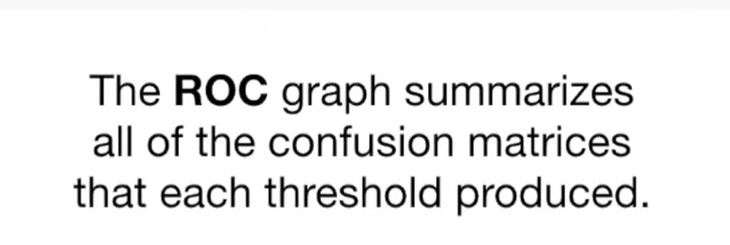

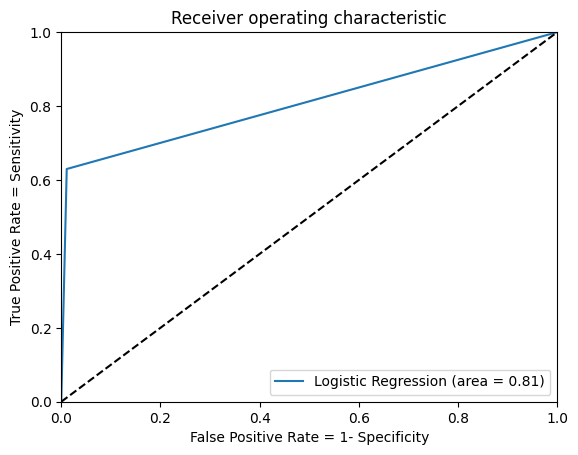

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_LogR) #površina ispd krivulje
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LogR)  #crtanje krivulje
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--') #dijagonala
plt.axis([0, 1, 0, 1]) #
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#Primjena na više klasa

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X=np.array(mnist.data)
y=np.array(mnist.target).astype(int)

In [ ]:
X=X[0:1000,:]/255
y=y[0:1000]

In [ ]:
#podjela na skupove
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, \
                                                    random_state=42)

####Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogR=LogisticRegression(max_iter=1000)  #

In [ ]:
model_LogR.fit(X_train,y_train)

In [ ]:
model_LogR.score(X_test,y_test)

In [ ]:
y_pred_LogR=model_LogR.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LogR))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_LogR)

In [ ]:
misclassified_index=[]
for i in range(y_test.shape[0]):
  if y_test[i] != y_pred_LogR[i]:
    misclassified_index.append(i)

In [ ]:
plt.figure(figsize=(20,20))
for i,index in enumerate(misclassified_index[0:5]):
  plt.subplot(151+i)
  plt.imshow(X_test[misclassified_index[i]].reshape(28,28))
  plt.title('Predvidio {}, stvarna {}'.format(y_pred_LogR[misclassified_index[i]],y_test[misclassified_index[i]]))
  #format(y_pred_LogR[misclassified_index[i]],y_test[misclassified_index[i]]))
plt.show()

####Zadatak: Support Vector Machine

Više o SVM na poveznici: https://www.youtube.com/watch?v=efR1C6CvhmE&t=644s&ab_channel=StatQuestwithJoshStarmer

Koristimo biblioteku: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_trian)
model_svm.score(X_test,y_test)

0.9666666666666667

In [ ]:
y_pred_svm=model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       273
           1       1.00      0.63      0.77        27

    accuracy                           0.97       300
   macro avg       0.98      0.81      0.88       300
weighted avg       0.97      0.97      0.96       300



In [ ]:
confusion_matrix(y_test, y_pred_svm)

array([[273,   0],
       [ 10,  17]])